# How many paths

We need to navigate through an `m x n` grid, starting at the top-left and exiting at the bottom-right. We can only move either down or right at any point in order to get to the finish. Additionally, certain grid entries can be blocked, as shown in the table below.  
How many unique paths exist?

### Example

```
Input:
[
  [0,0,0],
  [0,1,0],
  [0,0,0]
]

Expected Output: 2

Explanation:
There is one obstacle in the middle of the 3x3 grid above.
There are two ways to reach the bottom-right corner:
1. Right -> Right -> Down -> Down
2. Down -> Down -> Right -> Right
```

### Recursion without memoization

In [1]:
def how_many_paths(grid):
    return dfs(grid, (0, 0))
    
dirs = [(0,1), (1,0)]
def dfs(grid, start):
    if start[0] >= len(grid) or start[1] >= len(grid[0]) or grid[start[0]][start[1]] == 1: return 0
    end = (len(grid)-1, len(grid[0])-1)
    if start[0] == end[0] and start[1] == end[1]: return 1
    ans = 0
    for dir in dirs:
        ans += dfs(grid, (start[0]+dir[0], start[1]+dir[1]))
    return ans

### Tests

In [2]:
tests = [
    ([], 0),
    (
        [
            [0,0,0],
            [0,1,0],
            [0,0,0]
        ], 2
    ),
    (
        [
            [0,0,0],
            [0,0,0],
            [0,0,0]
        ], 6
    ),
    (
        [
            [1,0,0],
            [0,0,0],
            [0,0,0]
        ], 0
    ),
    (
        [
            [0,0,0],
            [0,0,0],
            [0,0,1]
        ], 0
    ),
    (
        [
            [0,0,1],
            [1,0,1],
            [0,0,0]
        ], 1
    ),
    (
        [
            [0,1,0],
            [1,1,0],
            [0,0,0]
        ], 0
    )
]

In [3]:
for grid, want in tests:
    assert how_many_paths(grid) == want

In [4]:
from datetime import datetime, timedelta

In [5]:
times = []
for x in range(14):
    grid = [[0 for i in range(x)] for j in range(x)]
    start = datetime.now()
    how_many_paths(grid)
    end = datetime.now()
    times.append((end-start)/timedelta(milliseconds=1))

In [6]:
import seaborn as sns

Actual runtime

<AxesSubplot:>

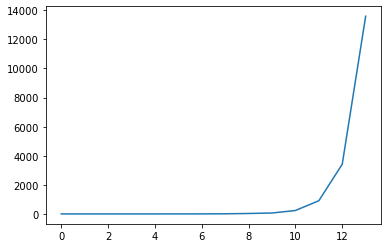

In [7]:
sns.lineplot(data=times)

O(n^2)

<AxesSubplot:>

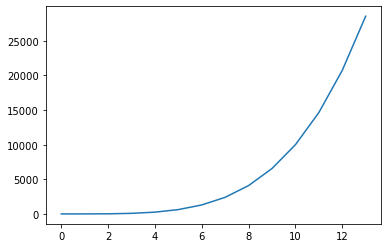

In [8]:
sns.lineplot(data=[(x*x)**2 for x in range(14)])

O(2^n)

<AxesSubplot:>

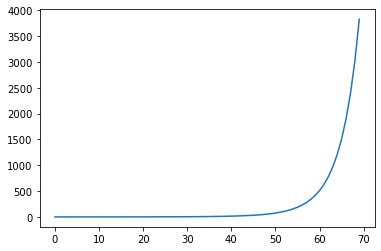

In [9]:
sns.lineplot(data=[2**(x/20*x/20) for x in range(70)])

### Recursion with memoization

In [10]:
dirs = [(0,1), (1,0)]
class solution():
    def __init__(self, grid):
        self.grid = grid
        self.visited = {}

    def how_many_paths(self):
        return self.dfs((0, 0))

    def dfs(self, start):
        if start in self.visited:
            return self.visited[start]
        if start[0] >= len(self.grid) or start[1] >= len(self.grid[0]) or self.grid[start[0]][start[1]] == 1: return 0
        end = (len(self.grid)-1, len(self.grid[0])-1)
        if start[0] == end[0] and start[1] == end[1]: return 1
        ans = 0
        for dir in dirs:
            ans += self.dfs((start[0]+dir[0], start[1]+dir[1]))
        self.visited[start] = ans
        return ans

### Tests

In [11]:
for grid, want in tests:
    s = solution(grid)
    assert s.how_many_paths() ==  want

In [12]:
times = []
for x in range(0, 200, 2):
    grid = [[0 for i in range(x)] for j in range(x)]
    start = datetime.now()
    s = solution(grid)
    s.how_many_paths()
    end = datetime.now()
    times.append((end-start)/timedelta(milliseconds=1))

Actual runtime

<AxesSubplot:>

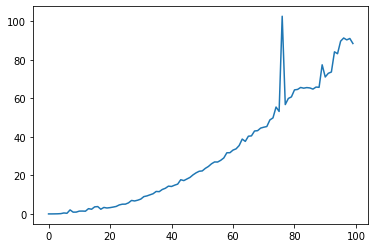

In [13]:
sns.lineplot(data=times)

O(n)

<AxesSubplot:>

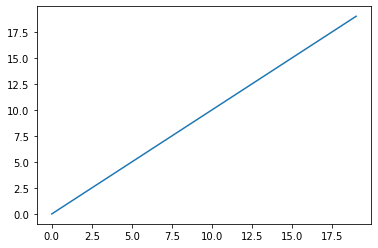

In [14]:
sns.lineplot(data=[x for x in range(20)])

### Dynamic Programming

In [15]:
def how_many_paths(grid):
    dp = [[0 for cell in row] for row in grid]
    for i, row in enumerate(grid):
        for j, cell in enumerate(row):
            if cell == 1: continue
            x = dp[i-1][j] if i > 0 else 0
            y = dp[i][j-1] if j > 0 else 0
            dp[i][j] = 1 if i == 0 and j == 0 else x+y
            if i == len(grid)-1 and j == len(grid[0])-1: return dp[i][j]
    return 0

### Tests

In [16]:
for grid, want in tests:
    assert how_many_paths(grid) == want

In [17]:
times = []
for x in range(0, 200, 2):
    grid = [[0 for i in range(x)] for j in range(x)]
    start = datetime.now()
    how_many_paths(grid)
    end = datetime.now()
    times.append((end-start)/timedelta(milliseconds=1))

Actual runtime

<AxesSubplot:>

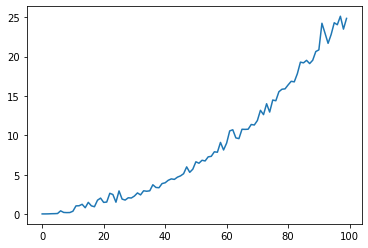

In [18]:
sns.lineplot(data=times)

O(n)

<AxesSubplot:>

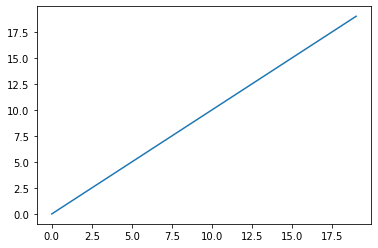

In [19]:
sns.lineplot(data=[x for x in range(20)])